# 1. Radar
Por: Camila Lopes ([cclopes.netlify.app](https://cclopes.netlify.app/))


Neste módulo, iremos aprender a lidar com dados de radares meteorológicos usando a linguagem Python, passando por leitura, visualização e processamento.


In [1]:
# Deixando os plots interativos
%matplotlib widget

# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import pyart
import wradlib as wrl

from read_mira_radar import read_mira
from read_brazil_radar_py3 import read_rainbow_hdf5
from read_sipam_cappis import read_sipam_cappi


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


## 1.2. Visualizando dados de radar

Agora que sabemos como ler diferentes formatos de dados de radar (seção 1.1), vamos aprender a visualizar esses dados com as bibliotecas Py-ART e wradlib.

Ambas bibliotecas usam o [matplotlib](https://matplotlib.org/) dentro de seus códigos. O matplotlib é a biblioteca de visualização mais utilizada em Python e permite um alto grau de personalização de diversos tipos de gráficos. Para isso, ele usa uma "estratégia" de construção de figuras (dentro do módulo [`pyplot`](https://matplotlib.org/stable/api/pyplot_summary.html)) a partir de um conjunto de objetos (ou **submódulos**) que definem cada parte da figura. Os principais objetos são:

- [`Figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html): base da figura total formada por um ou múltiplos paineis. Todos os outros objetos irão ser criados dentro desse objeto;
- [`Axes`](https://matplotlib.org/stable/api/axes_api.html): base de um painel. Os objetos de dados e eixos serão colocados dentro desse objeto;
- [`Axis`](https://matplotlib.org/stable/api/axis_api.html): eixos de um painel. Toda a configuração dos eixos x e y (e z, para um gráfico 3D) é feita aqui.

![Anatomia simples de uma figura do matplotlib](../dados/diversos/matplotlib_1.png)  
*Anatomia simples de uma figura do matplotlib. Fonte: https://realpython.com/python-matplotlib-guide/.*

De forma mais detalhada, esses são os objetos de uma figura, com respectivas funções ou classes do `matplotlib.pyplot`:

![Anatomia mais detalhada de uma figura no matplotlib](../dados/diversos/matplotlib_2.png)  
*Anatomia mais detalhada de uma figura no matplotlib. Fonte: [Livro "Scientific Visualization: Python & Matplotlib" (Nicolas Rougier)](https://hal.inria.fr/hal-03427242/document).*

A primeira linha de código que rodamos, `%matplotlib widget`, permite que as figuras plotadas neste notebook sejam **interativas**. Isso significa que é possível *literalmente* mexer na figura gerada, dando zoom numa região, movendo o axes, etc.

![Exemplo de interatividade de uma figura no Jupyter. Fonte: [How to produce Interactive Matplotlib Plots in Jupyter Environment](https://towardsdatascience.com/how-to-produce-interactive-matplotlib-plots-in-jupyter-environment-1e4329d71651)](https://miro.medium.com/max/1400/1*11_WvW_dvGcn-PHv5r08wg.gif)

> Veja exemplos de como usar widgets para uma interatividade maior ainda [neste artigo](https://kapernikov.com/ipywidgets-with-matplotlib/).

### 1.2.1. Py-ART

Como explicado anteriormente, o Py-ART possui 4 classes de variáveis com dados de radar: [`Radar`](https://arm-doe.github.io/pyart/API/generated/pyart.core.Radar.html#pyart.core.Radar), [`Grid`](https://arm-doe.github.io/pyart/API/generated/pyart.core.Grid.html#pyart.core.Grid), [`HorizontalWindProfile`](https://arm-doe.github.io/pyart/API/generated/pyart.core.HorizontalWindProfile.html#pyart.core.HorizontalWindProfile) ou [`RadarSpectra`](https://arm-doe.github.io/pyart/API/generated/pyart.core.RadarSpectra.html#pyart.core.RadarSpectra). Para cada classe existem classes e funções correspondentes para a visualização desses dados, que estão no módulo [`pyart.graph`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.html). Essas classes e suas respectivas funções serão explicadas a seguir.

Para todas as classes e funções de visualização de dados, a mesma estrutura é utilizada:

```{python}
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.[classe]([variável de radar])
# Abrindo a figura
fig = plt.figure()
# Gerando o plot
display.[função de plot](field=[campo da variável], [...])
```

Note que a variável de radar não é usada diretamente na função que plota os dados. Os parâmetros das funções de plot podem variar bastante, mas é sempre necessário especificar o campo (refletividade, velocidade doppler, etc) a ser plotado.

O código abaixo abre diferentes tipos de dados de radar para testarmos cada uma das classes.


In [2]:
# Lendo arquivos
dados_pp = pyart.io.read("../dados/radar/PP/PPR161225194610.RAWK318")
dados_sr = pyart.aux_io.read_gamic("../dados/radar/SR/SRO-250--2017-03-14--18-30-22.mvol")
dados_sipam = pyart.aux_io.read_gamic("../dados/radar/SIPAM/RADL08061720140301081200.HDF5")
dados_mira = read_mira("../dados/radar/MIRA_CAMPINA/20200306_0100.mmclx")[0]
dados_fcth = read_rainbow_hdf5("../dados/radar/FCTH/PNOVA2-20170314182730.HDF5")
dados_xpol = read_rainbow_hdf5("../dados/radar/XPOL_CMP/117BRX-20171115215006.HDF5")
dados_sipam_cappi = read_sipam_cappi("../dados/radar/SIPAM/sbmn_cappi_20140301_081203.nc")
dados_fcth_dbz = wrl.io.read_rainbow("../dados/radar/FCTH/2017031418273000dBZ.vol", loaddata=True)
dados_fcth_dbz_xr = wrl.io.open_radar_dataset("../dados/radar/FCTH/2017031418273000dBZ.vol", engine='rainbow')
dados_xpol_rmp = wrl.io.read_opera_hdf5("../dados/radar/XPOL_RELAMPAGO/117BRX-20181127130002.HDF5")

/home/camila/git/tutoriais-python/1.Radar/read_mira_radar.py:174: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sweep_mode["data"] = np.array(["vertical_pointing"], dtype=np.str)
/home/camila/git/tutoriais-python/1.Radar/read_mira_radar.py:238: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prt_mode["data"] = np.array(["fixed"], dtype=np.str)
/home/camila/m

#### [`RadarDisplay`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.html#pyart.graph.RadarDisplay)

A classe `RadarDisplay` plota dados do tipo `Radar` sem georreferenciamento. As funções de plot disponíveis são:

- [`plot(field, sweep=0)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot.html#pyart.graph.RadarDisplay.plot): similar à função `pyart.io.read()` mostrada na seção 1.1.2, essa função identifica o tipo de escaneamento (variável `scan_type`) e plota o campo de radar em uma projeção correspondente à ele (chamando a função `plot_ppi()`, `plot_rhi()` ou `plot_vpt()` explicadas abaixo). Além do campo (`field`), é necessário fornecer a elevação (`sweep`) ou será plotada a primeira elevação por padrão. É possível definir diversos parâmetros como limites de valores (`vmin` e `vmax`), escala de cores (`cmap`), legendas de título (`title`), eixos (`axislabels`) e escala de cores (`colorbar_label`), entre outros;

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


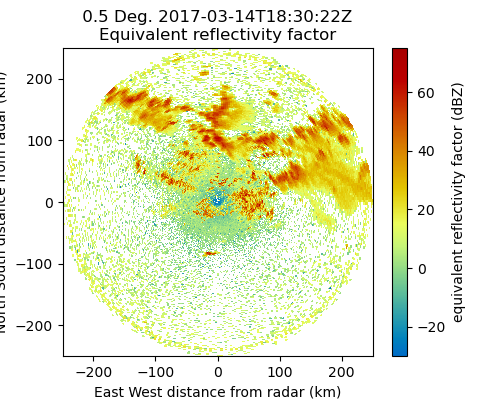

In [3]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarDisplay(dados_sr)
# Abrindo a figura
fig = plt.figure(figsize=(5, 4))
# Gerando o plot
display.plot(field="reflectivity", sweep=0)

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


(0.0, 20.0)

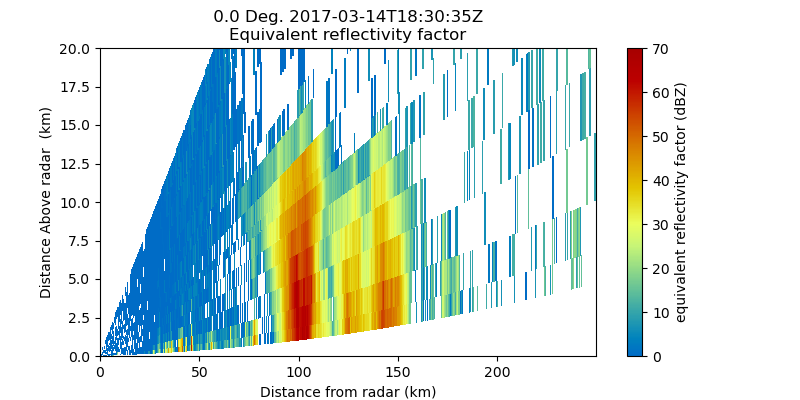

In [4]:
# Como exemplo do plot de RHI, podemos gerar um "pseudo-RHI" dos dados de PPI
# Para isso, selecionamos o azimute de interesse
# Esse passo não é mais necessário pois a função plot_azimuth_to_rhi() faz isso diretamente
cross_sec = pyart.util.cross_section_ppi(dados_sr, [0])

# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarDisplay(cross_sec)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
# Como o cross_sec só tem um azimute, não é preciso definir sweep
display.plot(field="reflectivity", vmin=0, vmax=70)
# Arrumando o eixo y
plt.ylim((0, 20))

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


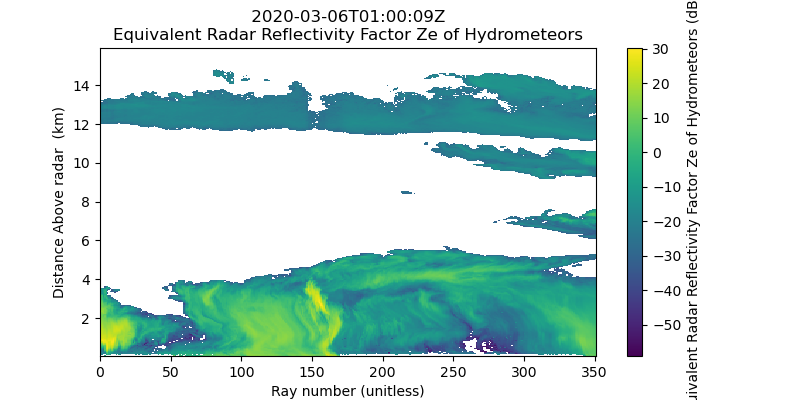

In [5]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarDisplay(dados_mira)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
# Como é do tipo VPT, não é necessário definir sweep
display.plot(field="Ze")

- [`plot_ppi(field, sweep=0)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot_ppi.html#pyart.graph.RadarDisplay.plot_ppi): plota o campo de radar (`field`) do tipo PPI em uma dada elevação (`sweep`);

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


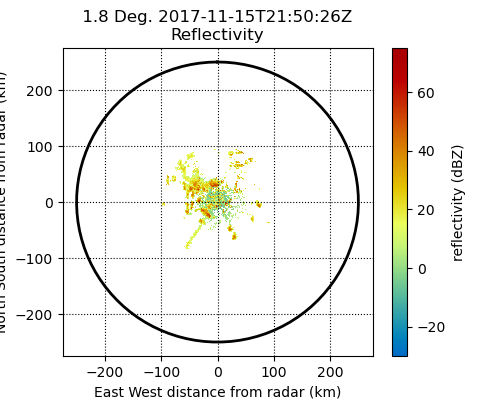

In [6]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarDisplay(dados_xpol)
# Abrindo a figura
fig = plt.figure(figsize=(5, 4))
# Gerando o plot
display.plot(field="reflectivity", sweep=1)
# Adicionando o contorno de 250 km de raio e uma grade
display.plot_range_ring(250)
display.plot_grid_lines()

- [`plot_ray(field, ray)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot_ray.html#pyart.graph.RadarDisplay.plot_ray): plota um único feixe (`ray`) do tipo PPI de um campo (`field`) em uma dada elevação (`sweep`);

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


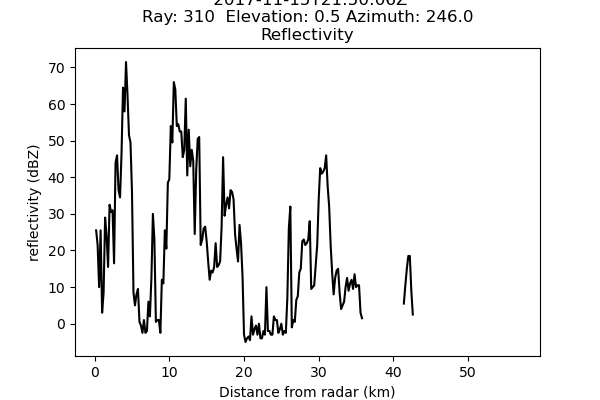

In [7]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarDisplay(dados_xpol)
# Abrindo a figura
fig = plt.figure(figsize=(6, 4))
# Gerando o plot
display.plot_ray(field="reflectivity", ray=310)

- [`plot_azimuth_to_rhi(field, target_azimuth)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot_azimuth_to_rhi.html#pyart.graph.RadarDisplay.plot_azimuth_to_rhi): plota um pseudo-RHI de dados de PPI de um campo (`field`) em um determinado azimute (`target_azimuth`);

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


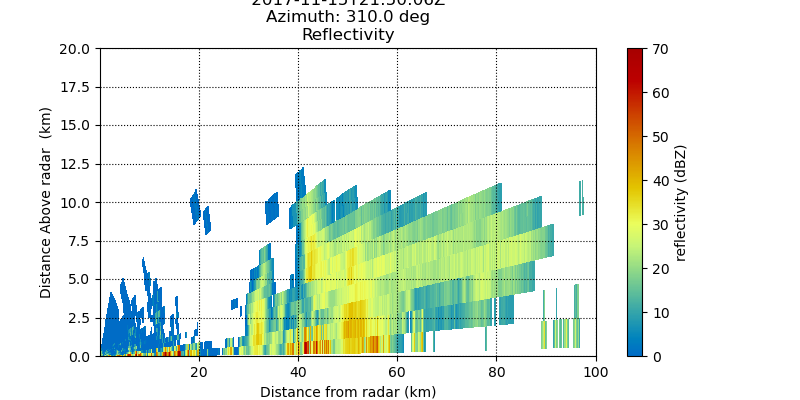

In [8]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarDisplay(dados_xpol)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
display.plot_azimuth_to_rhi(
    field="reflectivity", target_azimuth=310, vmin=0, vmax=70
)
# Arrumando o eixo y
plt.ylim((0, 20))
# Adicionando uma grade
display.plot_grid_lines()

- [`plot_rhi(field, sweep=0)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot_rhi.html#pyart.graph.RadarDisplay.plot_rhi): plota um perfil vertical de dados de RHI de um campo (`field`) em um determinado azimute (`sweep`);


/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


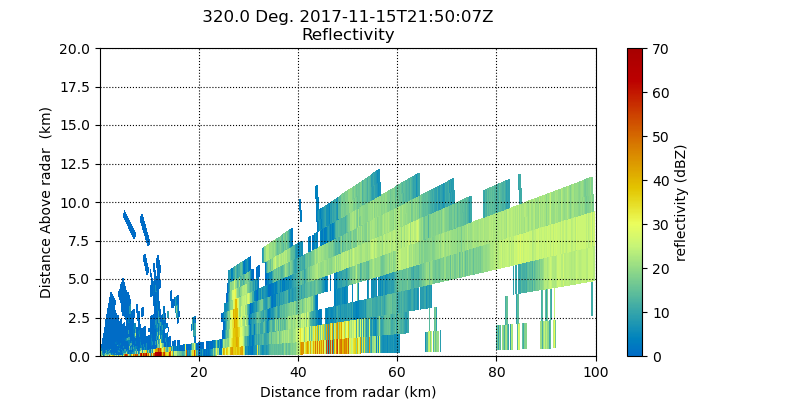

In [9]:
# Como exemplo do plot de RHI, podemos gerar um "pseudo-RHI" dos dados de PPI
# Para isso, selecionamos o azimute de interesse
# Isso não é mais necessário pois a função plot_azimuth_to_rhi() faz isso diretamente
cross_sec = pyart.util.cross_section_ppi(dados_xpol, [300, 310, 320])

# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarDisplay(cross_sec)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
display.plot_rhi(field="reflectivity", sweep=2, vmin=0, vmax=70)
# Arrumando o eixo y e adicionando uma grade
plt.ylim((0, 20))
display.plot_grid_lines()

- [`plot_vpt(field)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot_vpt.html#pyart.graph.RadarDisplay.plot_vpt): plota um perfil de apontamento vertical de um dado campo (`field`).

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


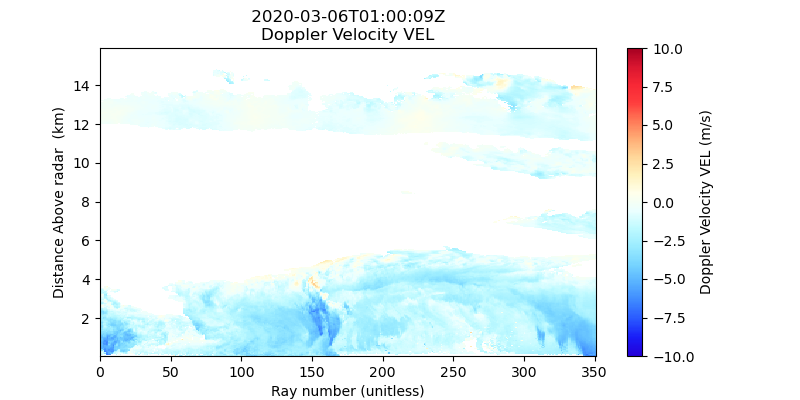

In [10]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarDisplay(dados_mira)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
display.plot_vpt(field="VEL", vmin=-10, vmax=10, cmap="pyart_BuDRd18")

#### [`RadarMapDisplay`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html#pyart.graph.RadarMapDisplay) ([`RadarMapDisplayBasemap`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplayBasemap.html#pyart.graph.RadarMapDisplayBasemap))

A classe `RadarMapDisplay` plota dados do tipo `Radar` com georreferenciamento. A partir da versão 1.8, a classe "padrão" usa a biblioteca [`cartopy`](https://scitools.org.uk/cartopy/docs/latest/) para a projeção em mapas, mas essa classe foi feita originalmente com a biblioteca [`basemap`](https://matplotlib.org/basemap/) (que está atualmente descontinuada) e suas funções correspondentes ainda estão disponíveis na classe `RadarMapDisplayBasemap`. Isso implica em algumas diferenças nos parâmetros utilizados nas funções de cada classe, que devem ser consultadas na [página da classe](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplayBasemap.html#pyart.graph.RadarMapDisplayBasemap). *Para ficar mais breve, apenas a classe `RadarMapDisplay` será descrita abaixo*.  

As funções de plot disponíveis são:

- [`plot(field, sweep=0)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.plot.html#pyart.graph.RadarMapDisplay.plot): igual (literalmente) a `pyart.graph.RadarDisplay.plot()`;

- [`plot_ppi(field, sweep=0)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.plot_ppi.html#pyart.graph.RadarMapDisplay.plot_ppi): igual (literalmente) a `pyart.graph.RadarDisplay.plot_ppi()`;

- [`plot_ppi_map(field, sweep=0)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.plot_ppi_map.html#pyart.graph.RadarMapDisplay.plot_ppi_map): plota o campo de radar (`field`) do tipo PPI de uma dada elevação (`sweep`) em um mapa geográfico. Além dos diversos parâmetros que podem ser configurados (`vmin` e `vmax`, `cmap`, `title`, `axislabels`, `colorbar_label`, etc.), um shapefile customizado pode ser carregado (`shapefile`) e configurado (`shapefile_kwargs`) e a projeção (`projection`) pode ser configurada (o padrão é `cartopy.crs.LambertConformal()`). **Parâmetros importantes para nós que trabalhamos com radares da América do Sul são os de latitude e longitude: `min_lon`, `max_lon`, `min_lat`, `max_lat` para os limites ou apenas `lon_lines`, `lat_lines` (matriz (`array`) de valores) para linhas de grade**. Se os parâmetros de linha de grade não forem configurados, o plot não vai ter valores nos eixos x e y porque as matrizes padrão de `lon_lines`, `lat_lines` são para radares dos EUA. *É um pouco inconveniente ter que configurar isso sempre, mas pelo menos os valores dos eixos já estarão bem formatados*;

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/pyart/graph/radarmapdisplay.py:281: UserWarning: No projection was defined for the axes. Overridding defined axes and using d

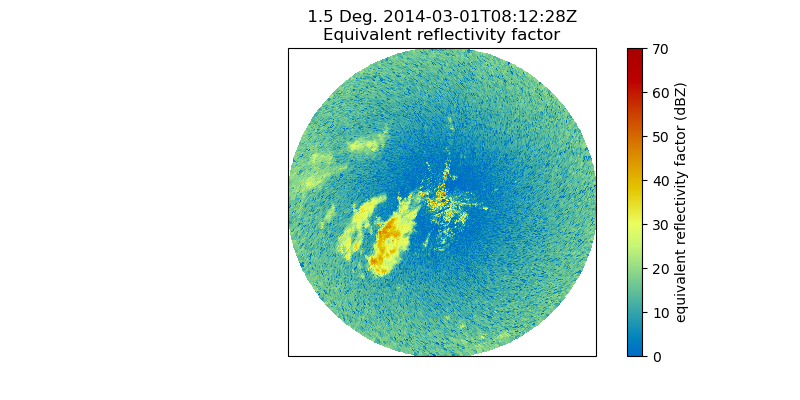

In [11]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarMapDisplay(dados_sipam)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
display.plot_ppi_map(field="reflectivity", sweep=1, vmin=0, vmax=70)

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/pyart/graph/radarmapdisplay.py:281: UserWarning: No projection was defined for the axes. Overridding defined axes and using d

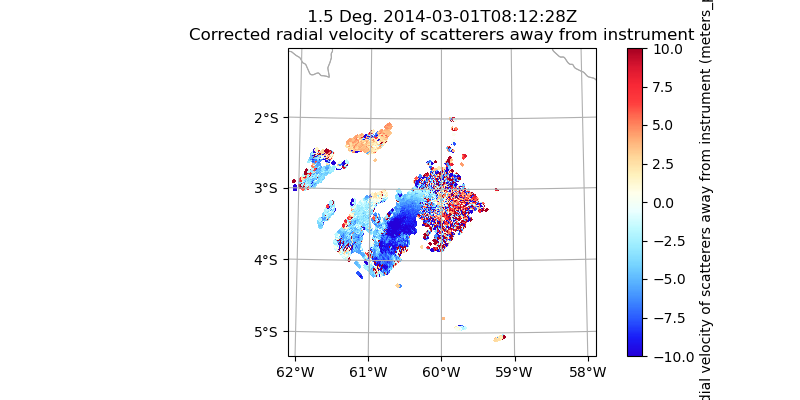

In [12]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarMapDisplay(dados_sipam)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
# Versão com linhas de lat/lon e shapefile
# Por padrão, o shapefile é plotado com preenchimento
# Por isso é necessário usar o parâmetro shapefile_kwargs
display.plot_ppi_map(
    field="corrected_velocity", 
    sweep=1,
    vmin=-10, vmax=10,
    lon_lines=np.arange(-62, -57), lat_lines=np.arange(-6, 0),
    shapefile="../dados/shapefiles/ne_10m_admin_1_states_provinces",
    shapefile_kwargs={
        "facecolor": "None",
        "edgecolor": "darkgray",
        "linewidth": 0.75
    }
)

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/pyart/graph/radarmapdisplay.py:281: UserWarning: No projection was defined for the axes. Overridding defined axes and using d

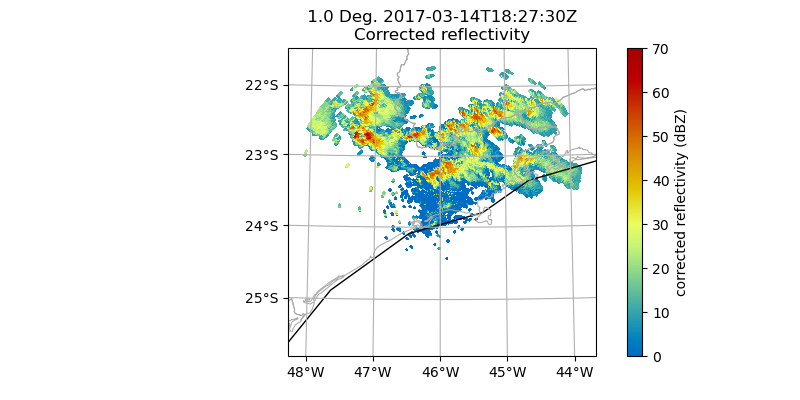

In [13]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.RadarMapDisplay(dados_fcth)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
# Versão com linhas de lat/lon e shapefile
display.plot_ppi_map(
    field="corrected_reflectivity",
    vmin=0, vmax=70,
    lon_lines=range(-50, -40), lat_lines=range(-30, -20),
    shapefile="../dados/shapefiles/ne_10m_admin_1_states_provinces",
    shapefile_kwargs={
        "facecolor": "None",
        "edgecolor": "darkgray",
        "linewidth": 0.75
    }
)

- [`plot_ray(field, ray)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.plot_ray.html#pyart.graph.RadarMapDisplay.plot_ray): igual (literalmente) a `pyart.graph.RadarDisplay.plot_ray()`;  

- [`plot_azimuth_to_rhi(field, target_azimuth)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.plot_azimuth_to_rhi.html#pyart.graph.RadarMapDisplay.plot_azimuth_to_rhi): igual (literalmente) a `pyart.graph.RadarDisplay.plot_azimuth_to_rhi()`;  

- [`plot_rhi(field, sweep=0)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.plot_rhi.html#pyart.graph.RadarMapDisplay.plot_rhi): igual (literalmente) a `pyart.graph.RadarDisplay.plot_rhi()`;  

- [`plot_vpt(field)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.plot_vpt.html#pyart.graph.RadarMapDisplay.plot_vpt): igual (literalmente) a `pyart.graph.RadarDisplay.plot_vpt()`.

#### [`GridMapDisplay`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.html#pyart.graph.GridMapDisplay) ([`GridMapDisplayBasemap`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplayBasemap.html#pyart.graph.GridMapDisplayBasemap))

A classe `GridMapDisplay` é similar à `RadarMapDisplay` só que para dados em grade, do tipo `Grid`, com georreferenciamento. Ela também foi feita originalmente com a biblioteca [`basemap`](https://matplotlib.org/basemap/) (atualmente descontinuada), com as funções correspondentes ainda disponíveis na classe `GridMapDisplayBasemap`. Consulte os parâmetros correspondentes à essa versão na [página da classe](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplayBasemap.html). *Apenas a classe `GridMapDisplay` será descrita abaixo*.  

- [`plot_grid(field, level=0)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.plot_grid.html#pyart.graph.GridMapDisplay.plot_grid): plota o campo de radar (`field`) do tipo grade de um dado nível (`elevation`) em um mapa geográfico. Além dos diversos parâmetros que podem ser configurados (`vmin` e `vmax`, `cmap`, `title`, `axislabels`, `colorbar_label`, etc.), a projeção (`projection`) pode ser configurada (o padrão é `cartopy.crs.LambertConformal()`. *Nos testes que fiz com essa função, a projeção padrão não está funcionando corretamente (as linhas de grade e shapefile não são plotadas), então recomendo usar a `cartopy.crs.PlateCarree()`*). **Diferentemente do `pyart.graph.RadarMapDisplay.plot_ppi_grid()`, não há necessidade de definir `lon_lines` e `lat_lines` para mostrar os valores dos eixos x e y, definir esses parâmetros irá modificar os limites do plot**. Além disso, não é possível carregar shapefiles diretamente na função (usar a projeção `cartopy.crs.PlateCarree()` gera um plot com shapefile de países por padrão), apenas separadamente (exemplo abaixo);

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


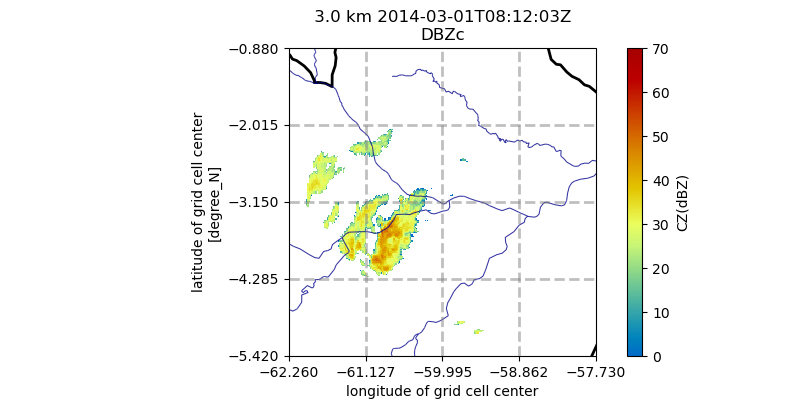

In [14]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.GridMapDisplay(dados_sipam_cappi)
# Abrindo a figura (e gerando um axes para usar depois)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
# Gerando o plot
display.plot_grid(
    field="DBZc",
    level=5,
    vmin=0, vmax=70,
    cmap='pyart_HomeyerRainbow',
    projection=ccrs.PlateCarree(),
    ax=ax
)
# Adicionando shapefile de rios como exemplo
ax.add_geometries(
    Reader("../dados/shapefiles/lineaire_1km").geometries(),
    ccrs.PlateCarree(),
    linewidth=0.75,
    facecolor="None",
    edgecolor="darkblue",
    alpha=0.8
)

- [`plot_latitude_slice(field, lat=None)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.plot_latitude_slice.html#pyart.graph.GridMapDisplay.plot_latitude_slice): plota um corte vertical em uma dada latitude (`lat`) de um campo de radar (`field`). Note que o eixo x está em função da distância em relação à posição do radar e não longitude;

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


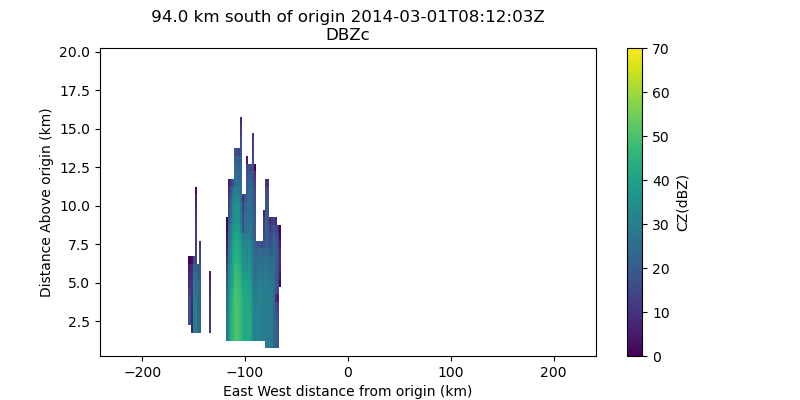

In [15]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.GridMapDisplay(dados_sipam_cappi)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
display.plot_latitude_slice(field="DBZc", lat=-4, vmin=0, vmax=70)

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


(-170.0, -50.0)

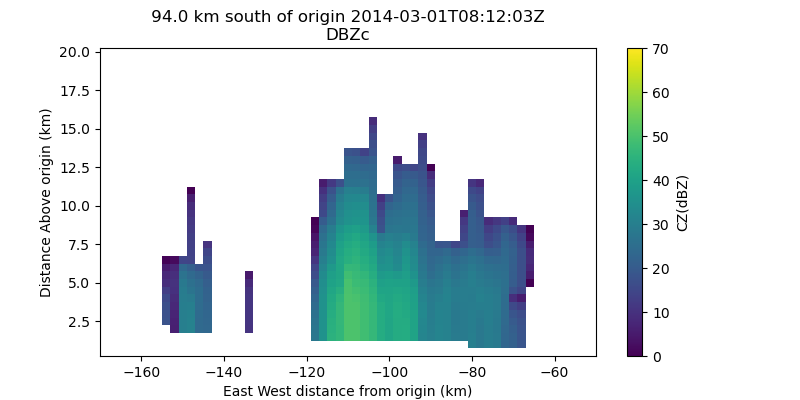

In [16]:
# Gerando outra versão do plot
# Com "zoom no sistema"
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Modificando limites do eixo x
display.plot_latitude_slice(field="DBZc", lat=-4, vmin=0, vmax=70)
plt.xlim(-170,-50)

- [`plot_longitude_slice(field, lon=None)`](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.plot_longitude_slice.html#pyart.graph.GridMapDisplay.plot_longitude_slice): plota um corte vertical em uma dada longitude (`lon`) de um campo de radar (`field`). Note que o eixo x está em função da distância em relação à posição do radar e não latitude;

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


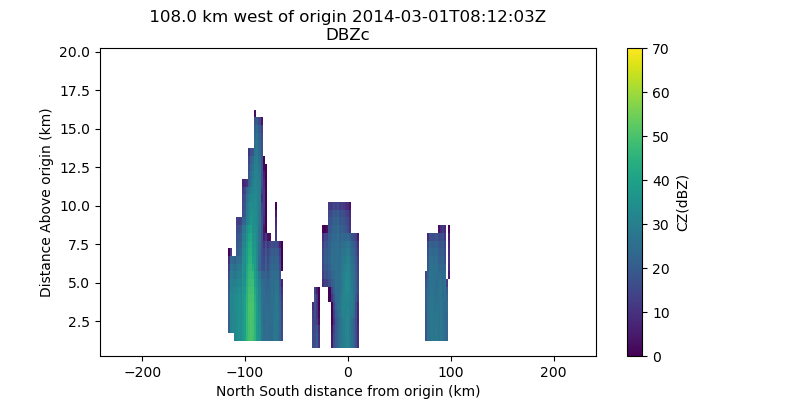

In [17]:
# Gerando um display da classe a partir da variável de radar
display = pyart.graph.GridMapDisplay(dados_sipam_cappi)
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Gerando o plot
display.plot_longitude_slice(field="DBZc", lon=-60.97, vmin=0, vmax=70)

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


(-130.0, -50.0)

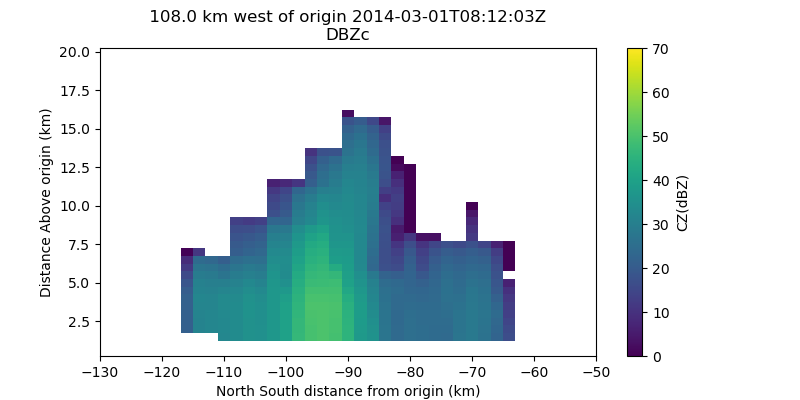

In [18]:
# Gerando outra versão do plot
# Com "zoom no sistema"
# Abrindo a figura
fig = plt.figure(figsize=(8, 4))
# Modificando limites do eixo x
display.plot_longitude_slice(field="DBZc", lon=-60.97, vmin=0, vmax=70)
plt.xlim(-130,-50)

### 1.2.2. wradlib

O wradlib também possui um módulo dedicado para plotar dados chamado [`wradlib.vis`](https://docs.wradlib.org/en/stable/vis.html). Diferentemente do Py-ART, as funções de plot estão definidas diretamente nesse módulo (em vez de separado em tipos de dados) e não é necessário gerar um display, apenas plotar os dados diretamente (como é feito no `matplotlib` com diferentes tipos de dados). Porém, para plotar os dados diretamente é preciso extrair eles da variável principal (que é formada por um dicionário ordenado em diversos níveis), ao contrário do Py-ART onde a função `[...]Display()` faz isso.

As principais funções disponíveis são:

- [`plot_ppi(data, r=None, az=None, elev=0.0)`](https://docs.wradlib.org/en/stable/generated/wradlib.vis.plot_ppi.html#wradlib.vis.plot_ppi): plota o campo de radar (em forma de `numpy.ndarray` com dimensões `(azimuth, range)` - `data`) em uma dada grade de range (`r`) e azimute (`az`) do tipo PPI em uma dada elevação (`elev`);

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


Text(0.5, 1.0, 'PonteNova2 1.0 deg 2017-03-14 18:27:30')

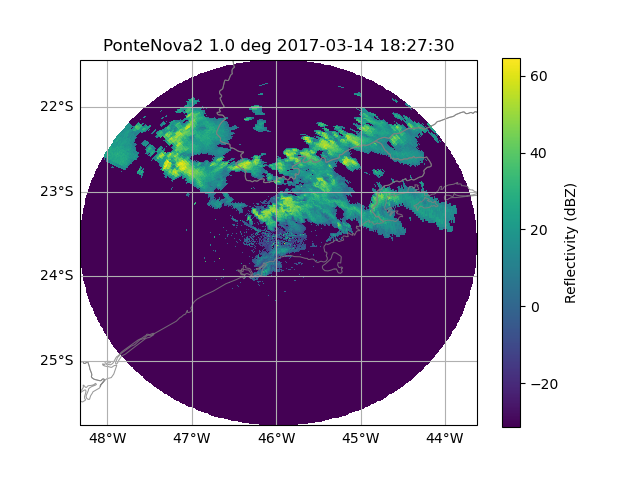

In [39]:
# Baseado em:
# - "Load and inspect data from a Rainbow file"
# https://docs.wradlib.org/en/stable/notebooks/fileio/wradlib_load_rainbow_example.html
# - "Quick-view a sweep in polar or cartesian reference systems"
# https://docs.wradlib.org/en/stable/notebooks/visualisation/wradlib_plot_ppi_example.html

# Extraindo manualmente as variáveis necessárias para plotar
# o campo de refletividade do primeiro nível de escaneamento

# - Azimute
azim = dados_fcth_dbz['volume']['scan']['slice'][0]['slicedata']['rayinfo']["data"]
azim_depth = float(dados_fcth_dbz['volume']['scan']['slice'][0]['slicedata']['rayinfo']['@depth'])
azim_range = float(dados_fcth_dbz['volume']['scan']['slice'][0]['slicedata']['rayinfo']['@rays'])
azim_res = float(dados_fcth_dbz['volume']['scan']['slice'][0]["anglestep"])
azim = (azim * azim_range / 2 ** azim_depth) * azim_res

# - Range
range_stop = float(dados_fcth_dbz["volume"]["scan"]["slice"][0]["stoprange"])
range_step = float(dados_fcth_dbz["volume"]["scan"]["slice"][0]["rangestep"])
r_range = np.arange(0, range_stop, range_step)

# - Refletividade
dbz = dados_fcth_dbz["volume"]["scan"]["slice"][0]["slicedata"]["rawdata"]["data"]
dbz_depth = float(dados_fcth_dbz["volume"]["scan"]["slice"][0]["slicedata"]["rawdata"]["@depth"])
dbz_min = float(dados_fcth_dbz["volume"]["scan"]["slice"][0]["slicedata"]["rawdata"]["@min"])
dbz_max = float(dados_fcth_dbz["volume"]["scan"]["slice"][0]["slicedata"]["rawdata"]["@max"])
dbz = dbz_min + dbz * (dbz_max - dbz_min) / 2 ** dbz_depth

# - Localização do site
site_lat = float(dados_fcth_dbz["volume"]["sensorinfo"]["lat"])
site_lon = float(dados_fcth_dbz["volume"]["sensorinfo"]["lon"])
site_alt = float(dados_fcth_dbz["volume"]["sensorinfo"]["alt"])
site = (site_lon, site_lat, site_alt)

# - Metadata
radar_name = dados_fcth_dbz["volume"]["sensorinfo"]["@name"]
date = dados_fcth_dbz["volume"]["scan"]["@date"] + " " + dados_fcth_dbz["volume"]["scan"]["@time"]
scan_angle = dados_fcth_dbz["volume"]["scan"]["slice"][0]["posangle"]

# Plotando
# - Configurações
map_proj = ccrs.PlateCarree(central_longitude=site[0])
# - Campo de refletividade
ax, pm = wrl.vis.plot_ppi(dbz, r=r_range * 1000, az=azim, site=site, proj=map_proj)
# - Shapefile de SP
ax.add_geometries(
    Reader("../dados/shapefiles/ne_10m_admin_1_states_provinces").geometries(),
    ccrs.PlateCarree(),
    linewidth=0.75,
    facecolor="None",
    edgecolor="gray",
    alpha=0.8
)
# - Linhas de grade
gridlines = ax.gridlines(draw_labels=True)
gridlines.top_labels = False
gridlines.right_labels = False
# - Barra de cores
cbar = plt.colorbar(pm, ax=ax)
cbar.set_label("Reflectivity (dBZ)")
# - Título
ax.set_title(radar_name + " " + scan_angle + " deg " + date)

- [`plot_rhi(data, r=None, th=None, az=0)`](https://docs.wradlib.org/en/stable/generated/wradlib.vis.plot_rhi.html): plota o campo de radar (em forma de `numpy.ndarray` com dimensões `(elevation, range)` - `data`) em uma dada grade de elevação (`th`) e range (`r`) do tipo RHI em um dado azimute (`az`);

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


(0.0, 20.0)

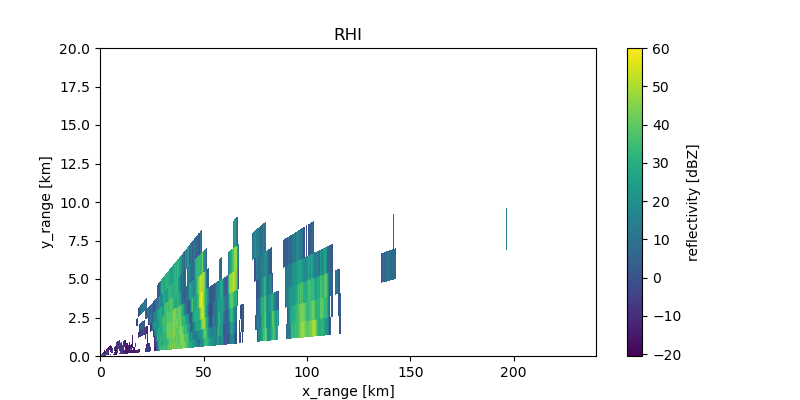

In [34]:
# Baseado em "Plot data to curvilinear grid"
# https://docs.wradlib.org/en/1.0.0/notebooks/visualisation/wradlib_plot_curvelinear_grids.html#Plot-CG-RHI

# Extraindo os dados de refletividade, elevação no azimute 0 (0.5 graus) para o RHI
# Por elevação (i)
i = 0
elev = dados_fcth_dbz_xr[i].elevation[i].data
dados_rhi = dados_fcth_dbz_xr[i].drop_vars("elevation")
dados_rhi = dados_rhi.expand_dims(dim=dict(elevation=[dados_rhi.attrs["fixed_angle"]]))
dados_rhi = dados_rhi.isel(azimuth=0)

for i in range(1, 8):
    elev = dados_fcth_dbz_xr[i].elevation[i].data
    dados_elev = dados_fcth_dbz_xr[i].drop_vars("elevation")
    dados_elev = dados_elev.expand_dims(dim=dict(elevation=[dados_elev.attrs["fixed_angle"]]))
    dados_rhi = xr.concat([dados_rhi, dados_elev.isel(azimuth=0)], dim="elevation")

# Plotando
fig, ax = plt.subplots(figsize=(8,4))
ax, pm = wrl.vis.plot_rhi(dados_rhi.DBZH.data, r=dados_rhi.range.data, th=dados_rhi.elevation.data, az=0, rf=1e3, fig=fig, ax=ax)

t = plt.title('RHI')
ax.set_ylim(0, 14)
cbar = plt.gcf().colorbar(pm, pad=0.05)
cbar.set_label('reflectivity [dBZ]')
ax.set_xlabel('x_range [km]')
ax.set_ylabel('y_range [km]')

plt.ylim((0, 20))

- [`plot_scan_strategy(ranges, elevs, sitecoords, beamwidth=1.0, vert_res=500.0, maxalt=10000.0)`](https://docs.wradlib.org/en/stable/generated/wradlib.vis.plot_scan_strategy.html): plota a estratégia de varredura do radar. Precisa das matrizes de ranges (`ranges`), elevações (`elevs`) e uma tupla de coordenadas do radar (`sitecoords`) no formato (longitude, latitude, altitude).

/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/home/camila/miniconda3/envs/tutoriais-python/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


Text(0.5, 1.0, 'FCTH S-Band')

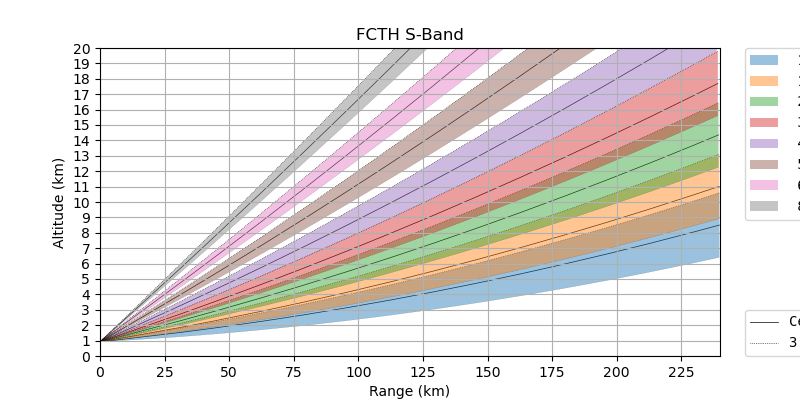

In [35]:
# Extraindo ranges e elevações com o Py-ART
ranges_fcth = dados_fcth.range["data"]
elevs_fcth = dados_fcth.fixed_angle["data"]
site_fcth = (
    float(dados_fcth.longitude["data"]),
    float(dados_fcth.latitude["data"]),
    float(dados_fcth.altitude["data"]),
)
beamwidth_fcth = 1

# Plotando com o wradlib
fig, ax = plt.subplots(figsize=(8,4))
wrl.vis.plot_scan_strategy(
    ranges_fcth, elevs_fcth, site_fcth, beamwidth_fcth, vert_res=1000, maxalt=20000, units="km", ax=ax
)
ax.set_title("FCTH S-Band")